PROBLEM STATEMENT : Retaining high profitable customers is the number one business goal.

In [20]:
# #recharge_data_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
#                  'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
#                  'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
#                  'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
#                  'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
#                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
path = "/content/drive/My Drive/telecom_churn_data.csv"
df_bonus = pd.read_csv(path)

In [23]:
tele_data = df_bonus.copy()

## IMPORTING LIABRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime


pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## IMPORTING DATASET

In [2]:
#Keeping the dataset in the same folder in which this notebook is

tele_data = pd.read_csv("telecom_churn_data.csv",na_values=['N/A','n/a','/','-','--'])

In [3]:
tele_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# DATA PREPARATION/CLEANING/EDA

#### 1. BASIC SANITY CHECKS

In [28]:
# removing unnecessary columns for analysis
# Below columns have single value across all data point. Not releavant for analysis
to_remove = []

for i in tele_data.columns:
    if tele_data[i].nunique() == 1:
        to_remove.append(i)



In [29]:
tele_data.drop(columns = to_remove, inplace=True)

In [30]:
# Renaming vbc columns in line with others
tele_data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)




In [31]:
# Defining various columns based on types

date_col= ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',\
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']


cat_col = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9']
           
id_col = ['mobile_number']

           
num_col = []

for i in list(tele_data.columns):
           if i not in date_col + cat_col + id_col:
                num_col.append(i)

In [32]:
#date columns do not add value in the analysis. Hence removing them

tele_data.drop(columns = date_col, inplace=True)

In [33]:
# Converting categorical columns to category type and numerical column to float
tele_data[cat_col] = tele_data[cat_col].astype('category')
tele_data[num_col]= tele_data[num_col].astype(np.float)

In [34]:
# Checking data type of each column
tele_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 202 columns):
 #   Column              Dtype   
---  ------              -----   
 0   mobile_number       int64   
 1   arpu_6              float64 
 2   arpu_7              float64 
 3   arpu_8              float64 
 4   arpu_9              float64 
 5   onnet_mou_6         float64 
 6   onnet_mou_7         float64 
 7   onnet_mou_8         float64 
 8   onnet_mou_9         float64 
 9   offnet_mou_6        float64 
 10  offnet_mou_7        float64 
 11  offnet_mou_8        float64 
 12  offnet_mou_9        float64 
 13  roam_ic_mou_6       float64 
 14  roam_ic_mou_7       float64 
 15  roam_ic_mou_8       float64 
 16  roam_ic_mou_9       float64 
 17  roam_og_mou_6       float64 
 18  roam_og_mou_7       float64 
 19  roam_og_mou_8       float64 
 20  roam_og_mou_9       float64 
 21  loc_og_t2t_mou_6    float64 
 22  loc_og_t2t_mou_7    float64 
 23  loc_og_t2t_mou_8    float64 
 24  l

In [35]:
# Total rech data columns is nothing but sum of count_rech_2g+ count_rech_3g. So removing it

# to_remove = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']
# tele_data.drop(columns = to_remove, inplace=True)


# Removing last day recharge amount as this amount is already considered in other columns. NOt significant for analysis

to_remove = ['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','last_day_rch_amt_9' ]
tele_data.drop(columns = to_remove, inplace=True)


In [36]:
#tele_data[['av_rech_amt_data_6','max_rech_data_6','total_rech_amt_6','max_rech_amt_6']]

In [37]:
# Checking the average recharge amount with maximum recharege amount

#tele_data[tele_data['av_rech_amt_data_6']>tele_data['max_rech_data_6']][['av_rech_amt_data_6','max_rech_data_6']]

#Average recharge amount cannot be greater than maximum recharge account . ALso if look into the data set related to maximum recharge, count of recharge(2g and 3g) and average recharge column properly it suggest that the average recharge amount is infact total recharge amount

#### 2. HANDLING MISSING VALUES

In [38]:
# Checking the count of missing values
tele_data.isnull().sum()/len(tele_data)*100

mobile_number          0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t

In [39]:
# 1. For data recharge releated columns 
# We see that the % of missing values is same across all the columns.
# We see that the volumne is zero for that month wherever the value is missing  
# It means no usage of data. Lets cross check this  for average recharge amount for all months

check = [0,0,0,0,0,0,0,0]
check[0] = tele_data[ tele_data['av_rech_amt_data_6'].isnull() ]['vol_2g_mb_6'].sum()
check[1] = tele_data[ tele_data['av_rech_amt_data_7'].isnull() ]['vol_2g_mb_7'].sum()
check[2] = tele_data[ tele_data['av_rech_amt_data_8'].isnull() ]['vol_2g_mb_8'].sum()
check[3] = tele_data[ tele_data['av_rech_amt_data_9'].isnull() ]['vol_2g_mb_9'].sum()
check[4] = tele_data[ tele_data['av_rech_amt_data_6'].isnull() ]['vol_3g_mb_6'].sum()
check[5] = tele_data[ tele_data['av_rech_amt_data_7'].isnull() ]['vol_3g_mb_7'].sum()
check[6] = tele_data[ tele_data['av_rech_amt_data_8'].isnull() ]['vol_3g_mb_8'].sum()
check[7] = tele_data[ tele_data['av_rech_amt_data_9'].isnull() ]['vol_3g_mb_9'].sum()
print(check)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


=> Similarly for other columns we will find same result. Hence we can impute all recharge data columns with zero

In [40]:
recharge_data_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                      'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

In [41]:
# Based on above analysis we can impute the entire dataframe with zero
tele_data[recharge_data_cols] = tele_data[recharge_data_cols].apply(lambda x : x.fillna(0))

In [42]:
ig_og_col = []

for i in list(tele_data.columns):
           if i not in date_col + cat_col + id_col + recharge_data_cols:
                ig_og_col.append(i)

In [43]:
# 2. For incoming and outoging related columns
# Here also we find that the % of missing values is same across all columns. This suggest that whever the total incoming
# or outgoing calls is zero then the value is missing. 
# Lets check that for month of 7 to verify

cols7 = tele_data[ig_og_col].filter(regex = '_7').columns

tele_data.loc[pd.isnull(tele_data[cols7]).any(axis=1)][cols7]


,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,vol_2g_mb_7,vol_3g_mb_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,vbc_3g_7
0,214.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,252.0,252.0,1.32,150.76,0.0,0.0,1.0,0.0,0.0
10,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
35,13.448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
45,7.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
68,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99948,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
99978,31.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
99993,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
99996,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


=>Similarly for other columns we will find same result. Hence we can impute all ic and og columns with zero

=> ALso the categorical columns have missing % Same as data recharege columns

In [44]:
# Based on above analysis we can impute the entire dataframe with zero
tele_data[ig_og_col] = tele_data[ig_og_col].apply(lambda x : x.fillna(0))


In [45]:
tele_data.isnull().sum()/len(tele_data)*100

mobile_number          0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            0.000000
onnet_mou_7            0.000000
onnet_mou_8            0.000000
onnet_mou_9            0.000000
offnet_mou_6           0.000000
offnet_mou_7           0.000000
offnet_mou_8           0.000000
offnet_mou_9           0.000000
roam_ic_mou_6          0.000000
roam_ic_mou_7          0.000000
roam_ic_mou_8          0.000000
roam_ic_mou_9          0.000000
roam_og_mou_6          0.000000
roam_og_mou_7          0.000000
roam_og_mou_8          0.000000
roam_og_mou_9          0.000000
loc_og_t2t_mou_6       0.000000
loc_og_t2t_mou_7       0.000000
loc_og_t2t_mou_8       0.000000
loc_og_t2t_mou_9       0.000000
loc_og_t2m_mou_6       0.000000
loc_og_t2m_mou_7       0.000000
loc_og_t2m_mou_8       0.000000
loc_og_t2m_mou_9       0.000000
loc_og_t2f_mou_6       0.000000
loc_og_t2f_mou_7       0.000000
loc_og_t

In [46]:
#3. Categorical columns
# This columns have value either 1 or 0. We will treating missing value as another category and ignore. SInce 0 will get ignored by model eventually replacing with zero
tele_data[cat_col] = tele_data[cat_col].apply(lambda x : x.fillna(0))

In [47]:
## OUTLIER TREATMENT

In [48]:
num_col = tele_data.select_dtypes(np.float).columns

In [49]:
num_col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'],
      dtype='object', length=189)

In [50]:
# Checking the skewness of data
tele_data[num_col].skew(axis=0, skipna=True)

arpu_6                 11.474894
arpu_7                 16.605237
arpu_8                 15.675775
arpu_9                 19.530101
onnet_mou_6             6.223445
onnet_mou_7             6.546565
onnet_mou_8             6.939513
onnet_mou_9             7.262126
offnet_mou_6            5.127132
offnet_mou_7            5.458859
offnet_mou_8            6.568971
offnet_mou_9            5.508372
roam_ic_mou_6          79.212165
roam_ic_mou_7         107.480786
roam_ic_mou_8          87.973024
roam_ic_mou_9          52.832861
roam_og_mou_6          14.011054
roam_og_mou_7          14.443375
roam_og_mou_8          21.775904
roam_og_mou_9          20.468027
loc_og_t2t_mou_6       14.042072
loc_og_t2t_mou_7       15.686033
loc_og_t2t_mou_8       18.939535
loc_og_t2t_mou_9       19.789225
loc_og_t2m_mou_6        6.128588
loc_og_t2m_mou_7        5.831030
loc_og_t2m_mou_8        5.646307
loc_og_t2m_mou_9        6.106047
loc_og_t2f_mou_6       23.060460
loc_og_t2f_mou_7       21.042316
loc_og_t2f

In [51]:
#tele_data[num_col] = tele_data[num_col].apply(lambda x : np.log(x))

In [52]:
tele_data[num_col].head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0

In [53]:
# We see a lot of columns have outliers. So keeping them at 1 and 99 percentile
for col in num_col:
    percentiles = tele_data[col].quantile([0.01,0.99]).values
    tele_data[col][tele_data[col] <= percentiles[0]] = percentiles[0]
    tele_data[col][tele_data[col] >= percentiles[1]] = percentiles[1]

#### 3. Defining Churners

In [54]:
# Defining Churners

#Calculating sum of incoming outgoing , 2g and 3g
tele_data['churn']= tele_data['total_ic_mou_9']+tele_data['total_og_mou_9']+tele_data['vol_2g_mb_9'] + tele_data['vol_3g_mb_9']

#If everything zero it means churn(1) else not churn(0)
tele_data['churn'] = tele_data['churn'].apply(lambda x:1 if x == 0 else 0)

In [55]:
# Remove columns for 9th month

tele_data.drop(columns = tele_data.filter(regex = '_9').columns, inplace = True)

In [56]:
tele_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0000,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.000,0.0000,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.4,0.0,101.20,1
1,7001865778,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.00,0.00,0.0,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.9100,0.0000,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.430,12.7600,0.00,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.0000,0.0000,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.0,0.00,0.00,0.0,4.0,9.0,11.0,74.0,384.0,283.0,44.0,154.0,65.0,0.0,1.0,2.0,0.0,154.0,25.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1006.0,0.0,0.0,0.00,0
2,7001625959,167.690,189.058,210.226,11.54,55.24,37.26,143.33,220.59,208.36,0.0,0.00,0.00,0.0,0.00,0.00,7.19,28.74,13.58,29.34,16.86,38.46,24.11,21.79,15.61,0.0,23.1104,24.0302,60.66,67.41,67.66,4.34,26.49,22.58,41.81,67.41,75.53,1.48,14.76,22.83,47.64,108.68,120.94,0.0,0.0,0.0,46.56,59.881,59.0816,0.45,0.0,0.0,155.3

#### 4. Finding high value customers

In [57]:
tele_data["total_rech_data_amt_6"] = tele_data["total_rech_data_6"]  * tele_data['av_rech_amt_data_6']
tele_data["total_rech_data_amt_7"] = tele_data["total_rech_data_7"]  * tele_data['av_rech_amt_data_7']




In [58]:
# Filtering high value customers

tele_data['good_rec_months'] = (tele_data['total_rech_amt_6']+tele_data['total_rech_amt_7']+tele_data["total_rech_data_amt_6"]+tele_data["total_rech_data_amt_7"])/2

tele_data = tele_data[tele_data['good_rec_months'] > tele_data['good_rec_months'].quantile(.7)]


In [59]:
#drop columns created to filter high value customers

tele_data.drop(columns = ['good_rec_months','total_rech_data_amt_7','total_rech_data_amt_6'], inplace=True)

In [60]:
#sns.boxplot(data = tele_data,y='arpu_8',x='churn')

In [61]:
# Finding class imbalance

len(tele_data[tele_data['churn'] == 1])/len(tele_data)*100

8.128292325131694

We will handle class imbalance by assiging weights during model building

#### 5. Derive Variables

In [62]:
# We will see the change in usage in 8 months w.r.t to average of 6 and 7 months as we are using usage based defination for churn


In [63]:
tele_data['total_rech_amt_diff'] = tele_data['total_rech_amt_8'] - (tele_data['total_rech_amt_6']+tele_data['total_rech_amt_7'])/2
tele_data['vol_2g_mb_diff'] = tele_data['vol_2g_mb_8'] - (tele_data['vol_2g_mb_6']+tele_data['vol_2g_mb_7'])/2
tele_data['vol_3g_mb_diff'] = tele_data['vol_3g_mb_8'] - (tele_data['vol_3g_mb_6']+tele_data['vol_3g_mb_7'])/2
tele_data['total_og_mou_diff'] = tele_data['total_og_mou_8'] - (tele_data['total_og_mou_6']+tele_data['total_og_mou_7'])/2
tele_data['total_ic_mou_diff'] = tele_data['total_ic_mou_8'] - (tele_data['total_ic_mou_6']+tele_data['total_ic_mou_7'])/2


#### 6. Data Visualization

In [64]:
#1. Lets look at distribution of important varialbes

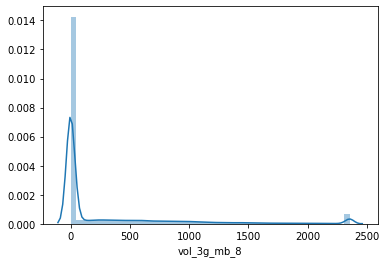

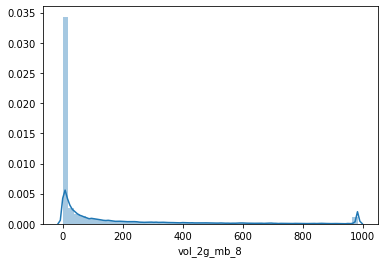

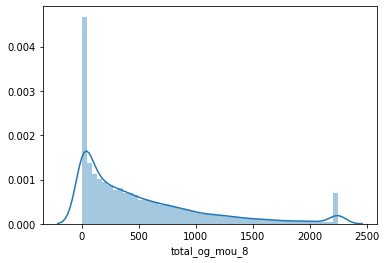

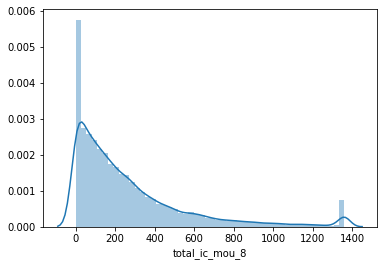

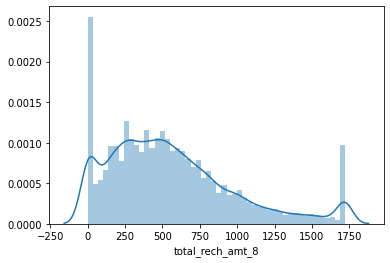

In [65]:
cols_vis = ['vol_3g_mb_8','vol_2g_mb_8','total_og_mou_8','total_ic_mou_8','total_rech_amt_8']
for i in cols_vis:
    sns.distplot(tele_data[i])
    plt.show()

In [66]:
# 2. Lets look important varialbes of 8 month with respect to churn 

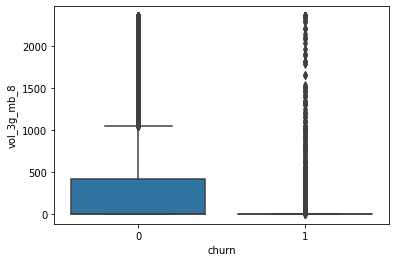

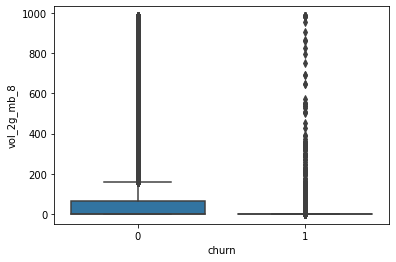

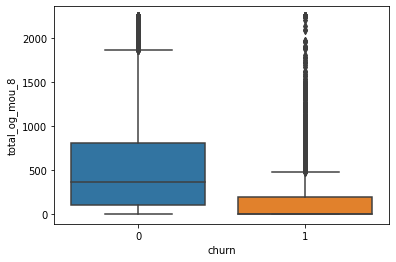

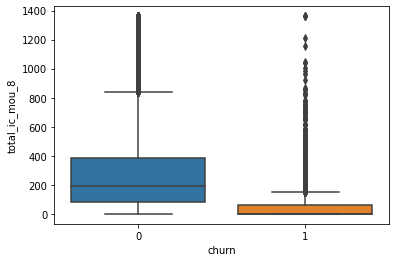

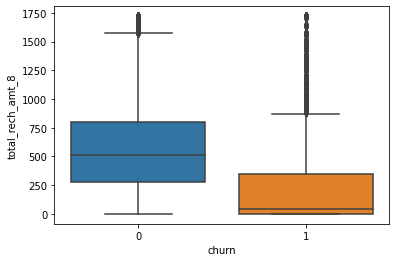

In [67]:
cols_vis = ['vol_3g_mb_8','vol_2g_mb_8','total_og_mou_8','total_ic_mou_8','total_rech_amt_8']
for i in cols_vis:
    sns.boxplot(x='churn', y=i ,data = tele_data)
    plt.show()

In [68]:
#3. Lets look at the categorical variables

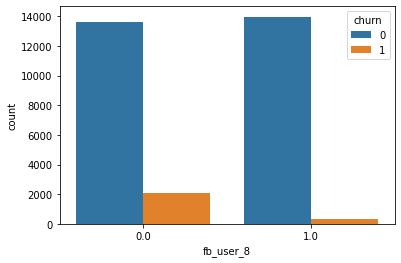

In [69]:
sns.countplot(data=tele_data, x ='fb_user_8',hue='churn')

In [70]:
pd.crosstab(tele_data['churn'],tele_data['fb_user_8'], normalize = True) *100

fb_user_8,0.0,1.0
churn,,
0,45.319064,46.552644
1,6.974728,1.153564


In [71]:
pd.crosstab(tele_data['churn'],tele_data['night_pck_user_8'], normalize = True) *100

night_pck_user_8,0.0,1.0
churn,,
0,90.764820,1.106888
1,8.098286,0.030006


In [72]:
#4. Lets look at the difference column we derived

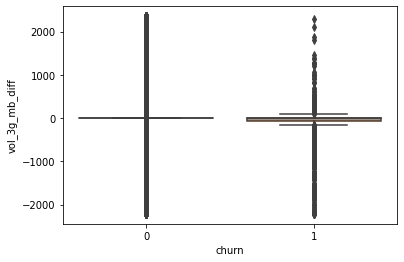

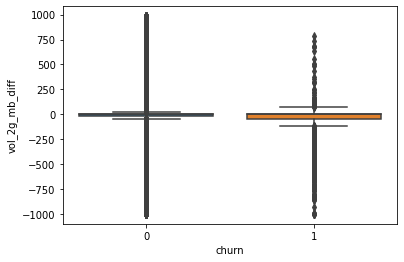

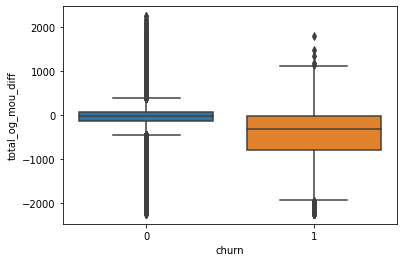

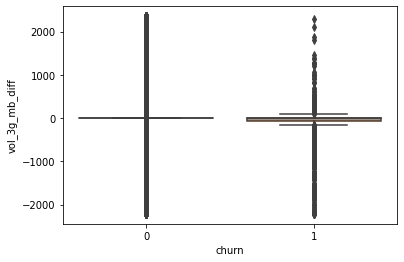

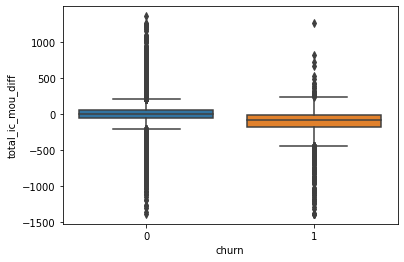

In [73]:
cols_vis = ['vol_3g_mb_diff','vol_2g_mb_diff','total_og_mou_diff','vol_3g_mb_diff','total_ic_mou_diff']

for i in cols_vis:
  sns.boxplot(x='churn', y=i ,data = tele_data)
  plt.show()

In [74]:
#5. Lets check churn vs age on network

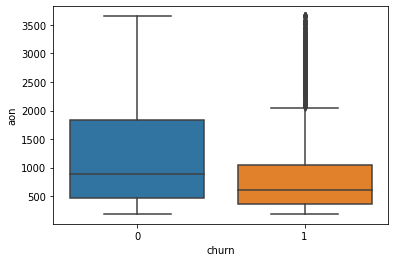

In [75]:

sns.boxplot(x='churn', y='aon' ,data = tele_data)

In [76]:
#sns.barplot(x='fb_user_8',y='aon',hue='churn',data=tele_data, estimator = np.mean)

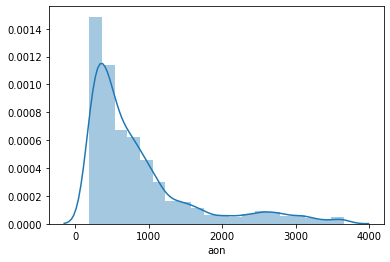

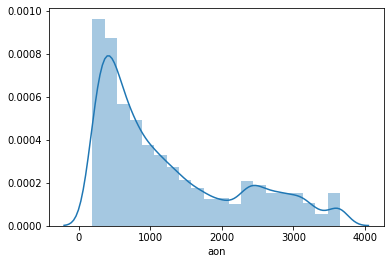

In [77]:
sns.distplot(tele_data[tele_data['churn'] ==1]['aon'],bins=int(100/5))
plt.show()
sns.distplot(tele_data[tele_data['churn'] ==0]['aon'],bins=int(100/5))
plt.show()

In [78]:
#6. Lets check correlation of churn with all varialbles

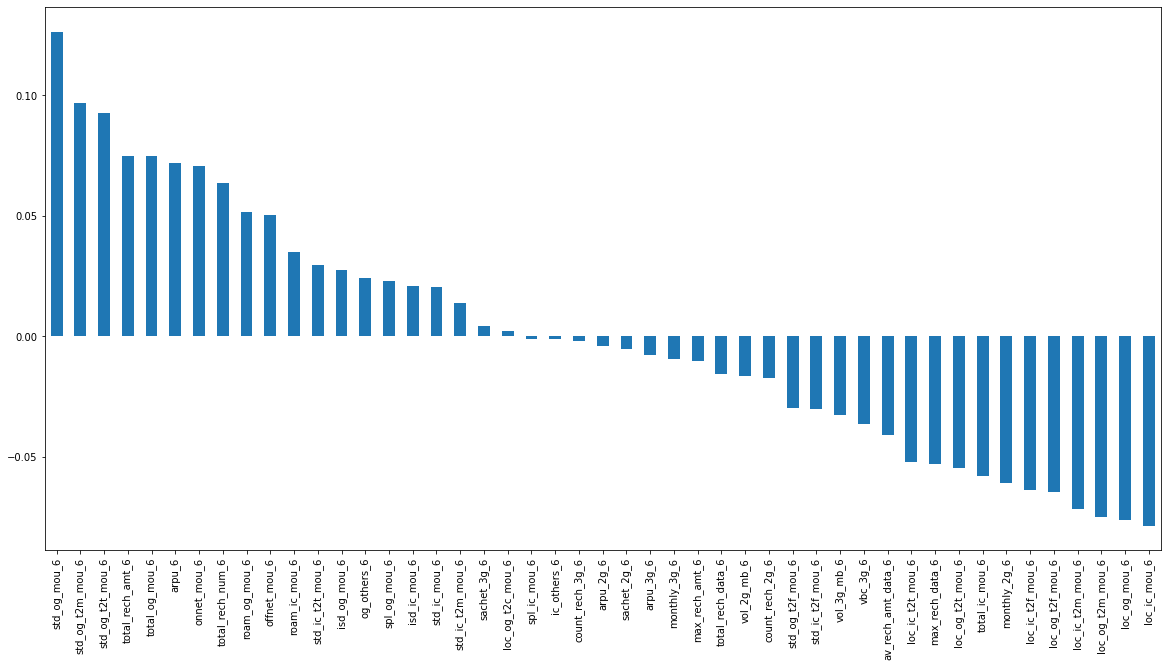

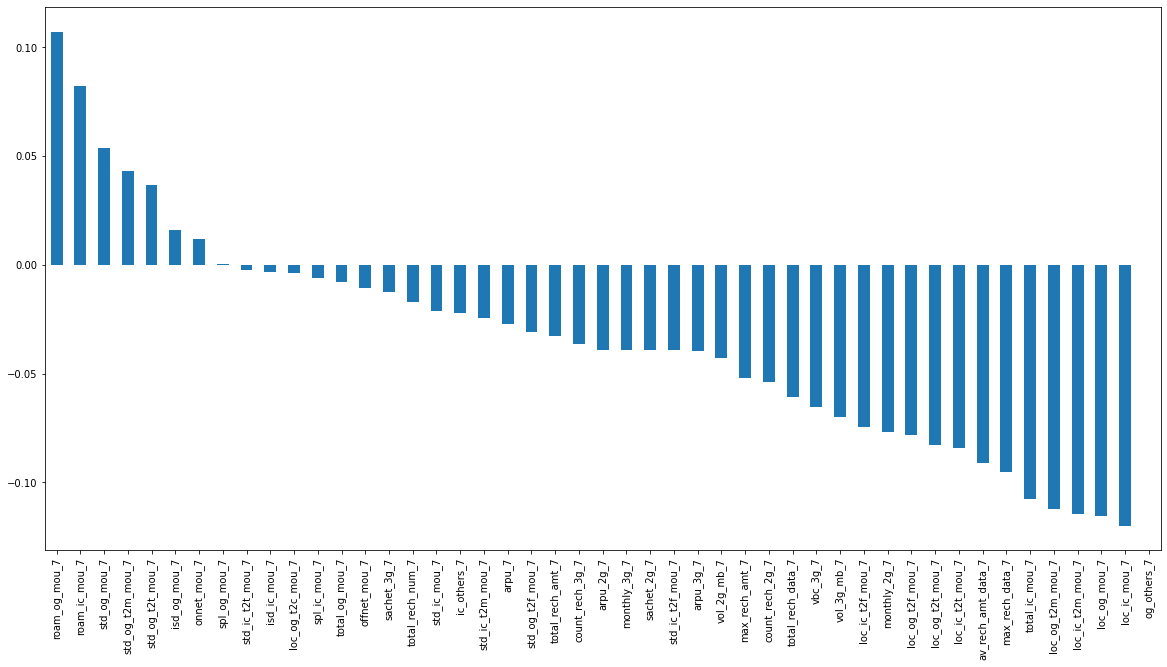

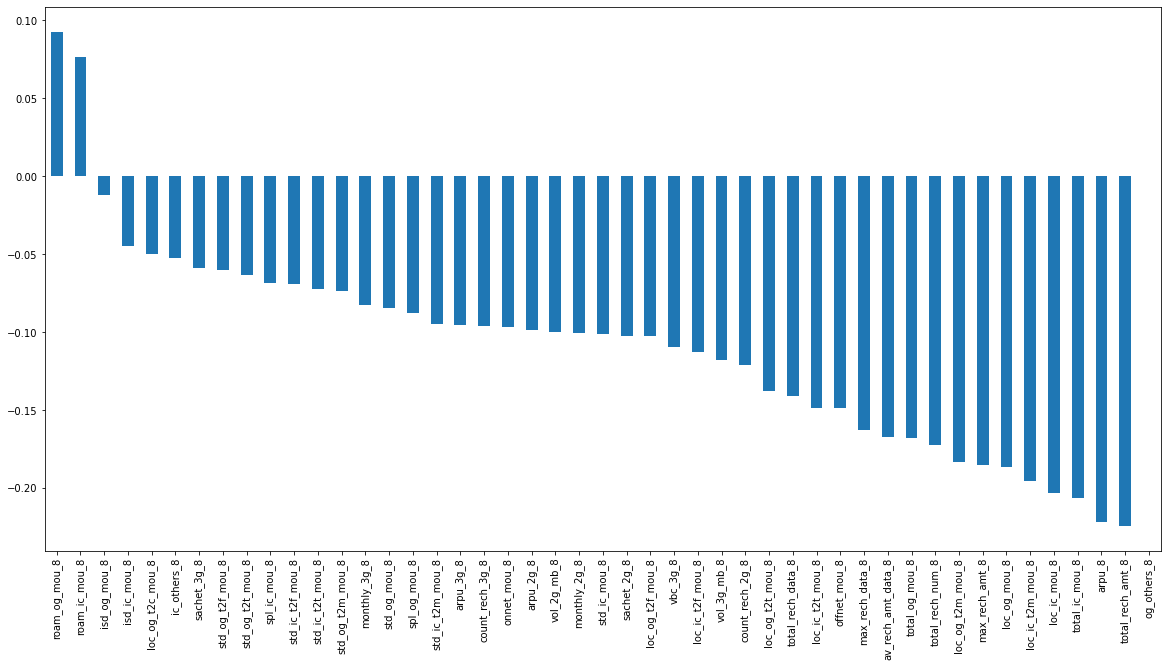

In [79]:
plt.figure(figsize=(20,10))
tele_data.corr()['churn'].filter(regex = '_6').sort_values(ascending = False).plot(kind = 'bar')
plt.show()
plt.figure(figsize=(20,10))
tele_data.corr()['churn'].filter(regex = '_7').sort_values(ascending = False).plot(kind = 'bar')
plt.show()
plt.figure(figsize=(20,10))
tele_data.corr()['churn'].filter(regex = '_8').sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [81]:
#=> CONCLUSTIONS




In [82]:
# Making a copy of final cleaned data to be used in model
tele_data_fin = tele_data.copy()

In [83]:
tele_data_fin

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,total_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_og_mou_diff,total_ic_mou_diff
0,7000842753,197.385,214.816,213.80300,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.0000,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000,0.00,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0000,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.1300,0.00,0.00,1.15,0.00,0.00,5.4400,0.00,0.00,0.00,0.0000,0.00,0.00,0.0000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.0000,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.130,1.32,5.75,83.57,150.76,109.6100,212.17,212.17,212.170,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.4000,0.00,101.20,1,-55.0,-9.9750,-7.5550,0.000,5.440
7,7000701601,1069.180,1349.850,1455.53996,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.3900,31.38,40.2800,308.63,447.38,162.28,53.631,54.591,53.23,0.00,0.00,0.00,422.160,533.91,255.7900,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,6.4002,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.1900,152.16,101.46,39.53,427.88,355.23,188.0400,36.89,11.83,30.39,91.4400,126.99,141.33,40.1302,34.24,22.21,180.540,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,14.0802,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1721.0,550.0,550.0,550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.7400,19.38,18.74,1,536.0,0.0000,0.0000,-198.225,-163.510
8,7001524846,378.721,492.223,137.36200,413.69,351.

## MODEL BUILDING

In [84]:
# tele_data_fin_num  =tele_data_fin.select_dtypes(np.number)
# tele_data_fin_cat  = tele_data_fin.select_dtypes(exclude = np.number)
# tele_data_fin_y = tele_data_fin[['mobile_number','churn']]

# #tele_data_fin_cat.head()

#### 1. Spliting into train test and Scaling

In [85]:
# Dividing into X and y

X = tele_data_fin.drop(columns = ['mobile_number','churn'])
y = tele_data_fin['churn']
orignal_id = tele_data_fin['mobile_number'] # keeping the mobile number in separate column

In [86]:
# Splitting into train , test

from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [88]:
X_train_num  = X_train.select_dtypes(np.number)
X_train_cat  = X_train.select_dtypes(exclude = np.number)

In [89]:
# Scaling

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_num_scal = scaler.fit_transform(X_train_num)

In [90]:
X_train_num_scal_df = pd.DataFrame(X_train_num_scal, columns = X_train_num.columns, index = X_train_cat.index)

In [91]:
X_train_scal = pd.concat([X_train_cat,X_train_num_scal_df],axis=1)

In [92]:
X_train_scal

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_og_mou_diff,total_ic_mou_diff
42871,0.0,0.0,0.0,0.0,0.0,0.0,-0.037650,-0.227751,-0.635287,1.808712,0.874228,-0.223141,-0.663739,-0.653694,-0.778795,-0.302627,0.005442,1.003424,-0.324397,1.092104,2.606540,-0.103579,-0.473878,-0.599612,-0.457179,-0.744649,-0.744156,-0.460106,-0.462225,-0.450894,-0.353110,5.145291,-0.347982,-0.396048,-0.734393,-0.777825,2.249597,1.109329,-0.318212,-0.421223,-0.388541,-0.488078,-0.264582,-0.262418,-0.254784,1.064302,0.410775,-0.504496,-0.206785,-0.203533,-0.191474,-0.502020,1.990147,-0.508366,-0.395228,0.0,0.0,0.673158,0.013932,-0.833943,-0.399904,-0.648835,-0.640781,-0.433931,-0.511118,-0.666520,-0.465759,-0.462026,-0.464707,-0.515129,-0.654579,-0.747088,3.270016,1.044669,-0.385484,-0.419942,-0.236794,-0.480552,-0.293067,-0.297915,-0.295613,0.785188,0.143234,-0.512449,-0.303753,-0.575239,-0.809892,-0.429441,-0.217467,-0.255354,-0.273904,-0.284082,-0.271767,-0.277106,-0.283406,-0.271724,0.326014,0.843726,0.169671,0.131547,-0.346786,-0.570134,-0.414660,-0.422211,-0.844206,-0.689186,-0.689512,-0.641239,-0.800378,-0.809152,-0.747459,-0.563360,-0.569650,-0.546727,-0.498839,-0.497009,-0.464325,-0.814350,-0.825972,-0.747082,-0.475674,-0.469521,-0.430598,-0.525558,-0.544246,-0.516261,-0.477864,-0.477623,-0.453955,-0.502792,-0.499229,-0.471619,-0.426089,-0.435027,-0.400572,-0.476952,-0.497441,-0.471192,-0.403281,-0.402347,-0.388151,-0.327527,-0.322028,-0.291747,0.334004,-0.485738,-0.489829,-0.469553,-0.588440,0.102622,0.009261,-1.672422,-0.622787
85575,0.0,0.0,0.0,1.0,1.0,0.0,0.430374,0.306394,-1.091957,0.808831,-0.565746,-0.605621,-0.165131,0.139441,-0.537812,-0.208933,0.103542,-0.275626,0.203639,0.234516,0.134786,-0.460337,-0.454690,-0.548196,-0.802752,-0.650013,-0.695943,-0.460106,-0.462225,-0.450894,-0.331267,1.265891,-0.347982,-0.764080,-0.664880,-0.725898,1.165423,-0.4469

In [93]:
# Scaling on test data
X_test_num  = X_test.select_dtypes(np.number)
X_test_cat  = X_test.select_dtypes(exclude = np.number)

X_test_num_scal = scaler.transform(X_test_num)

In [94]:
X_test_num_scal_df = pd.DataFrame(X_test_num_scal, columns = X_test_num.columns, index = X_test_cat.index)

In [95]:
X_test_scal = pd.concat([X_test_cat,X_test_num_scal_df],axis=1)

#### 2. PCA

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca_model = PCA(random_state =100)

In [98]:
pca_model.fit(X_train_scal)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [99]:
pca_model.components_

array([[-2.25658637e-03, -1.89248238e-03, -1.65429674e-03, ...,
         5.60820925e-03, -1.71311670e-02, -5.97216956e-03],
       [ 3.20705207e-04,  1.60634166e-04,  3.36506488e-04, ...,
         1.67749386e-02,  3.52666751e-02,  1.19105298e-02],
       [ 1.28487608e-03,  1.70144864e-03,  2.03199521e-03, ...,
         1.04231148e-02,  8.54247788e-03,  2.39896728e-02],
       ...,
       [-0.00000000e+00,  1.27328127e-16, -4.97196509e-17, ...,
         1.15880313e-02, -1.80398922e-02,  4.87524431e-02],
       [ 0.00000000e+00, -1.27937997e-15,  8.62589486e-16, ...,
        -1.10021866e-02,  3.87943926e-01, -2.27976951e-02],
       [-0.00000000e+00, -1.47273243e-16,  2.00856658e-16, ...,
         2.53097407e-04, -9.65627459e-03, -1.59170848e-03]])

In [100]:
pca_model.explained_variance_ratio_*100

array([1.31786703e+01, 1.13805206e+01, 7.09576822e+00, 5.15738109e+00,
       4.21715846e+00, 3.35389081e+00, 3.00481423e+00, 2.51128032e+00,
       2.44836572e+00, 2.40055341e+00, 2.17012606e+00, 1.90646455e+00,
       1.88316481e+00, 1.77857876e+00, 1.61332685e+00, 1.54246912e+00,
       1.40955916e+00, 1.36207971e+00, 1.31970765e+00, 1.24464123e+00,
       1.14711103e+00, 1.08348186e+00, 1.03413781e+00, 9.61834789e-01,
       9.49255465e-01, 8.84247371e-01, 8.31299237e-01, 7.97924302e-01,
       7.51178007e-01, 7.26459710e-01, 6.81973351e-01, 6.77484814e-01,
       6.62779270e-01, 6.42823326e-01, 6.11928006e-01, 5.97535377e-01,
       5.95731291e-01, 5.71289036e-01, 5.59378929e-01, 5.31955755e-01,
       5.19382249e-01, 5.01107471e-01, 4.81104685e-01, 4.67680260e-01,
       4.53916355e-01, 4.39146789e-01, 3.92062586e-01, 3.84438918e-01,
       3.76776649e-01, 3.74776374e-01, 3.54612967e-01, 3.29142814e-01,
       3.27199252e-01, 3.04184515e-01, 2.98307353e-01, 2.88495727e-01,
      

<BarContainer object of 153 artists>

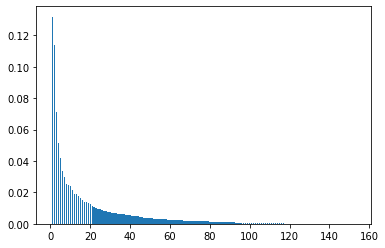

In [101]:
plt.bar(range(1,len(pca_model.explained_variance_ratio_)+1),pca_model.explained_variance_ratio_)

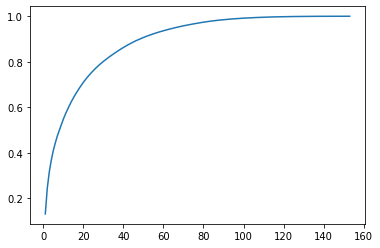

In [102]:
var_cumu = np.cumsum(pca_model.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [103]:
# Final PCA model

comp = 60

pca_model = PCA(n_components = comp, random_state=100)
X_train_scal_pca = pca_model.fit_transform(X_train_scal)

In [104]:
X_train_scal_pca.shape

(20995, 60)

In [105]:
#  PCA on test data


X_test_scal_pca = pca_model.transform(X_test_scal)

In [106]:
X_test_scal_pca.shape

(8999, 60)

In [107]:
#### 3. Logistic Regression

# 3.1 LOGISTIC REGRESSION + PCA

In [108]:
# Importing Libraries

from sklearn.linear_model import LogisticRegression

# Assigining more weights to class 1 as we want to predict 1 correctly and due to imbalance in data
logistic = LogisticRegression(class_weight = {0:0.1,1:0.9})

In [109]:
# X_train_sm = sm.add_constant(X_train_num_scal_pca) 
# logm1 = sm.GLM(y_train,(X_train_sm), family=sm.families.Binomial())
# logm1.fit().summary()

lr = logistic.fit(X_train_scal_pca,y_train)

In [110]:
y_train_pred = lr.predict_proba(X_train_scal_pca)
Y_train_pred_ax = lr.predict(X_train_scal_pca)
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred[:,1]})


# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_train, y_train_pred)
# print(confusion_matrix)

In [111]:
y_train_pred_final

,Churn,Churn_Prob
42871,1,0.767612
85575,1,0.922515
12271,0,0.053859
33592,0,0.153504
93379,0,0.059960
...,...,...
40269,0,0.122938
81475,0,0.396691
47139,0,0.251043
77835,0,0.250773


In [112]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [113]:
auc_score

0.8955187935452924

In [114]:
# Finding optimal cut off point

num = [i/10 for i in range(0,10,1)]

for i in num:
    y_train_pred_final[i] = y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x>i else 0)
y_train_pred_final

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
42871,1,0.767612,1,1,1,1,1,1,1,1,0,0
85575,1,0.922515,1,1,1,1,1,1,1,1,1,1
12271,0,0.053859,1,0,0,0,0,0,0,0,0,0
33592,0,0.153504,1,1,0,0,0,0,0,0,0,0
93379,0,0.059960,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40269,0,0.122938,1,1,0,0,0,0,0,0,0,0
81475,0,0.396691,1,1,1,1,0,0,0,0,0,0
47139,0,0.251043,1,1,1,0,0,0,0,0,0,0
77835,0,0.250773,1,1,1,0,0,0,0,0,0,0


In [115]:
cut_off = pd.DataFrame(columns = ['Probability','Sensitivity', 'Specificity', 'Accuracy', 'Precision', 'Recall'])

In [116]:
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i])
    total1=sum(sum(cm1))
    Acc = (cm1[0,0]+cm1[1,1])/total1
    
    Spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Pre =  cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cut_off.loc[i*10] =[ i ,Sensi,Spec,Acc, Pre, Sensi]

Text(0.5, 0, '')

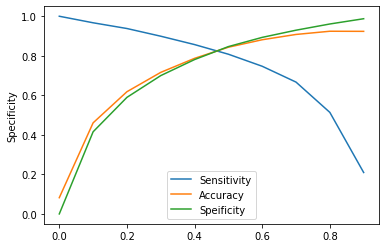

In [117]:
sns.lineplot(x = 'Probability', y ='Sensitivity', data= cut_off, label="Sensitivity")
sns.lineplot(x = 'Probability', y ='Accuracy', data= cut_off,label="Accuracy")
sns.lineplot(x = 'Probability', y ='Specificity', data= cut_off,label = 'Speificity')
plt.xlabel("")


In [118]:
cut_off[:]

,Probability,Sensitivity,Specificity,Accuracy,Precision,Recall
0.0,0.0,1.000000,0.000000,0.082067,0.082067,1.000000
1.0,0.1,0.966918,0.415473,0.460729,0.128838,0.966918
2.0,0.2,0.937899,0.589612,0.618195,0.169659,0.937899
3.0,0.3,0.899013,0.699720,0.716075,0.211150,0.899013
4.0,0.4,0.856645,0.780822,0.787045,0.258947,0.856645
5.0,0.5,0.807893,0.846461,0.843296,0.319926,0.807893
6.0,0.6,0.746953,0.893109,0.881115,0.384523,0.746953
7.0,0.7,0.666860,0.929431,0.907883,0.457951,0.666860
8.0,0.8,0.513639,0.960824,0.924125,0.539634,0.513639
9.0,0.9,0.209518,0.987443,0.923601,0.598673,0.209518


In [119]:
# Evaluation on test data

In [120]:
y_test_pred = lr.predict_proba(X_test_scal_pca)
Y_train_pred_ax = lr.predict(X_test_scal_pca)
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred[:,1]})

In [121]:
auc_score = metrics.roc_auc_score( y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)

In [122]:
auc_score

0.8989199839272269

In [123]:
# Finding optimal cut off point

num = [i/10 for i in range(0,10,1)]

for i in num:
    y_test_pred_final[i] = y_test_pred_final['Churn_Prob'].map(lambda x : 1 if x>i else 0)
y_test_pred_final

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
86190,0,0.007169,1,0,0,0,0,0,0,0,0,0
65290,0,0.277922,1,1,1,0,0,0,0,0,0,0
14064,1,0.805097,1,1,1,1,1,1,1,1,1,0
20767,0,0.442595,1,1,1,1,1,0,0,0,0,0
84021,0,0.364611,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18784,0,0.003828,1,0,0,0,0,0,0,0,0,0
4712,0,0.197738,1,1,0,0,0,0,0,0,0,0
15296,0,0.305654,1,1,1,1,0,0,0,0,0,0
39169,0,0.602273,1,1,1,1,1,1,1,0,0,0


In [124]:
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final[i])
    total1=sum(sum(cm1))
    Acc = (cm1[0,0]+cm1[1,1])/total1
    
    Spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Pre =  cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cut_off.loc[i*10] =[ i ,Sensi,Spec,Acc, Pre, Sensi]

Text(0.5, 0, '')

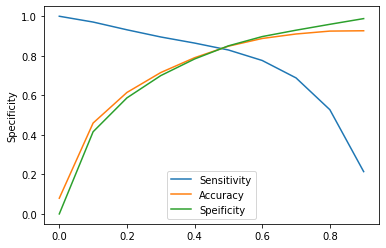

In [125]:
sns.lineplot(x = 'Probability', y ='Sensitivity', data= cut_off, label="Sensitivity")
sns.lineplot(x = 'Probability', y ='Accuracy', data= cut_off,label="Accuracy")
sns.lineplot(x = 'Probability', y ='Specificity', data= cut_off,label = 'Speificity')
plt.xlabel("")


In [126]:
cut_off[:]

,Probability,Sensitivity,Specificity,Accuracy,Precision,Recall
0.0,0.0,1.000000,0.000000,0.079453,0.079453,1.000000
1.0,0.1,0.970629,0.415620,0.459718,0.125384,0.970629
2.0,0.2,0.931469,0.587035,0.614402,0.162956,0.931469
3.0,0.3,0.895105,0.699662,0.715191,0.204604,0.895105
4.0,0.4,0.864336,0.783800,0.790199,0.256538,0.864336
5.0,0.5,0.829371,0.850193,0.848539,0.323337,0.829371
6.0,0.6,0.776224,0.897151,0.887543,0.394456,0.776224
7.0,0.7,0.688112,0.929382,0.910212,0.456825,0.688112
8.0,0.8,0.527273,0.959198,0.924881,0.527273,0.527273
9.0,0.9,0.213986,0.988049,0.926547,0.607143,0.213986


# 3.2 LOGISTIC REGRESSION + PCA + HYPERPARAMETER TUNNING

In [127]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [128]:
params = {'C':[0.1,0.5,1,2,5,10,15]}

logistic_hyper = LogisticRegression(class_weight = {0:0.1,1:0.9})

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic_hyper, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [129]:
model.fit(X_train_scal_pca,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [130]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.165419,0.015315,0.004823,0.000585,0.1,{'C': 0.1},0.896649,0.881981,0.895038,0.882518,0.888444,0.888926,0.006108,1
1,0.167666,0.013096,0.004185,0.000075,0.5,{'C': 0.5},0.896796,0.882020,0.894823,0.882592,0.888200,0.888886,0.006084,2
2,0.167950,0.013387,0.004363,0.000045,1,{'C': 1},0.896845,0.882021,0.894776,0.882594,0.888184,0.888884,0.006087,3
3,0.167711,0.016592,0.004402,0.000084,2,{'C': 2},0.896862,0.882016,0.894751,0.882599,0.888144,0.888874,0.006087,4
4,0.166426,0.014556,0.004229,0.000055,5,{'C': 5},0.896869,0.882018,0.894731,0.882609,0.888138,0.888873,0.006083,7
5,0.159243,0.013925,0.004282,0.000066,10,{'C': 10},0.896869,0.882020,0.894729,0.882618,0.888134,0.888874,0.006081,5
6,0.164810,0.010093,0.004067,0.000632,15,{'C': 15},0.896870,0.882018,0.894726,0.882618,0.888133,0.888873,0.006080,6


In [131]:
# Finding best parameters
print("Best AUC: ", model.best_score_)
print("Best params: ", model.best_params_)

Best AUC:  0.8889261040935461
Best params:  {'C': 0.1}


In [132]:
logistic_hyper = LogisticRegression(class_weight = {0:0.1,1:0.9}, C=10)

lr = logistic_hyper.fit(X_train_scal_pca,y_train)

In [133]:
y_train_pred = lr.predict_proba(X_train_scal_pca)
#Y_train_pred_ax = lr.predict(X_train_scal_pca)
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred[:,1]})


# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_train, y_train_pred)
# print(confusion_matrix)

In [134]:
y_train_pred_final

,Churn,Churn_Prob
42871,1,0.767323
85575,1,0.922889
12271,0,0.053694
33592,0,0.153174
93379,0,0.059833
...,...,...
40269,0,0.122896
81475,0,0.397109
47139,0,0.251032
77835,0,0.251073


In [135]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [136]:
auc_score

0.8955309902626227

In [137]:
# Finding optimal cut off point

num = [i/10 for i in range(0,10,1)]

for i in num:
    y_train_pred_final[i] = y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x>i else 0)
y_train_pred_final

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
42871,1,0.767323,1,1,1,1,1,1,1,1,0,0
85575,1,0.922889,1,1,1,1,1,1,1,1,1,1
12271,0,0.053694,1,0,0,0,0,0,0,0,0,0
33592,0,0.153174,1,1,0,0,0,0,0,0,0,0
93379,0,0.059833,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40269,0,0.122896,1,1,0,0,0,0,0,0,0,0
81475,0,0.397109,1,1,1,1,0,0,0,0,0,0
47139,0,0.251032,1,1,1,0,0,0,0,0,0,0
77835,0,0.251073,1,1,1,0,0,0,0,0,0,0


In [138]:
cut_off = pd.DataFrame(columns = ['Probability','Sensitivity', 'Specificity', 'Accuracy', 'Precision', 'Recall'])

In [139]:
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i])
    total1=sum(sum(cm1))
    Acc = (cm1[0,0]+cm1[1,1])/total1
    
    Spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Pre =  cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cut_off.loc[i*10] =[ i ,Sensi,Spec,Acc, Pre, Sensi]

Text(0.5, 0, '')

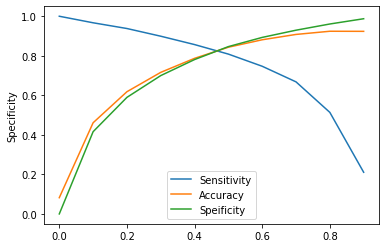

In [140]:
sns.lineplot(x = 'Probability', y ='Sensitivity', data= cut_off, label="Sensitivity")
sns.lineplot(x = 'Probability', y ='Accuracy', data= cut_off,label="Accuracy")
sns.lineplot(x = 'Probability', y ='Specificity', data= cut_off,label = 'Speificity')
plt.xlabel("")


In [141]:
cut_off[:]

,Probability,Sensitivity,Specificity,Accuracy,Precision,Recall
0.0,0.0,1.000000,0.000000,0.082067,0.082067,1.000000
1.0,0.1,0.966918,0.415940,0.461157,0.128927,0.966918
2.0,0.2,0.937899,0.589612,0.618195,0.169659,0.937899
3.0,0.3,0.899013,0.699772,0.716123,0.211179,0.899013
4.0,0.4,0.856645,0.780874,0.787092,0.258993,0.856645
5.0,0.5,0.808474,0.846409,0.843296,0.320009,0.808474
6.0,0.6,0.746953,0.892954,0.880972,0.384179,0.746953
7.0,0.7,0.668021,0.929431,0.907978,0.458383,0.668021
8.0,0.8,0.513639,0.960772,0.924077,0.539305,0.513639
9.0,0.9,0.210679,0.987391,0.923648,0.599010,0.210679


In [142]:
# Evaluation on test data

In [143]:
y_test_pred = lr.predict_proba(X_test_scal_pca)
Y_train_pred_ax = lr.predict(X_test_scal_pca)
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred[:,1]})

In [144]:
auc_score = metrics.roc_auc_score( y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)

In [145]:
auc_score

0.8989108670180616

In [146]:
# Finding optimal cut off point

num = [i/10 for i in range(0,10,1)]

for i in num:
    y_test_pred_final[i] = y_test_pred_final['Churn_Prob'].map(lambda x : 1 if x>i else 0)
y_test_pred_final

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
86190,0,0.007166,1,0,0,0,0,0,0,0,0,0
65290,0,0.277879,1,1,1,0,0,0,0,0,0,0
14064,1,0.805067,1,1,1,1,1,1,1,1,1,0
20767,0,0.443925,1,1,1,1,1,0,0,0,0,0
84021,0,0.363925,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18784,0,0.003795,1,0,0,0,0,0,0,0,0,0
4712,0,0.195823,1,1,0,0,0,0,0,0,0,0
15296,0,0.306456,1,1,1,1,0,0,0,0,0,0
39169,0,0.602368,1,1,1,1,1,1,1,0,0,0


In [147]:
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final[i])
    total1=sum(sum(cm1))
    Acc = (cm1[0,0]+cm1[1,1])/total1
    
    Spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Pre =  cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cut_off.loc[i*10] =[ i ,Sensi,Spec,Acc, Pre, Sensi]

Text(0.5, 0, '')

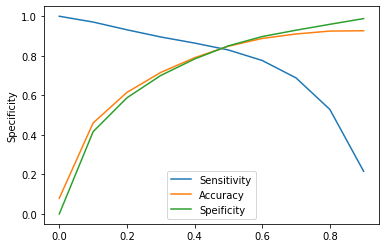

In [148]:
sns.lineplot(x = 'Probability', y ='Sensitivity', data= cut_off, label="Sensitivity")
sns.lineplot(x = 'Probability', y ='Accuracy', data= cut_off,label="Accuracy")
sns.lineplot(x = 'Probability', y ='Specificity', data= cut_off,label = 'Speificity')
plt.xlabel("")


In [149]:
cut_off[:]

,Probability,Sensitivity,Specificity,Accuracy,Precision,Recall
0.0,0.0,1.000000,0.000000,0.079453,0.079453,1.000000
1.0,0.1,0.970629,0.415862,0.459940,0.125429,0.970629
2.0,0.2,0.931469,0.587397,0.614735,0.163075,0.931469
3.0,0.3,0.895105,0.700266,0.715746,0.204931,0.895105
4.0,0.4,0.864336,0.783679,0.790088,0.256432,0.864336
5.0,0.5,0.829371,0.850193,0.848539,0.323337,0.829371
6.0,0.6,0.776224,0.897272,0.887654,0.394737,0.776224
7.0,0.7,0.688112,0.929382,0.910212,0.456825,0.688112
8.0,0.8,0.528671,0.959198,0.924992,0.527933,0.528671
9.0,0.9,0.215385,0.988049,0.926659,0.608696,0.215385


In [169]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(class_weight={0:0.1,1:0.9})

In [170]:
model_dt.fit(X_train_scal_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [171]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Making predictions
y_pred_default = model_dt.predict(X_test_scal_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8284
           1       0.34      0.34      0.34       715

    accuracy                           0.89      8999
   macro avg       0.64      0.64      0.64      8999
weighted avg       0.89      0.89      0.89      8999



In [172]:
cm = confusion_matrix(y_test,y_pred_default)
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7806  478]
 [ 474  241]]
0.8942104678297589


In [173]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print(sensitivity)

0.33706293706293705


In [174]:
precision =  cm[1,1]/(cm[0,1]+cm[1,1])
print(precision)

0.33518776077885953


In [175]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rfc = RandomForestClassifier(class_weight = {0:0.1,1:0.9})

In [182]:
rfc.fit(X_train_scal_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [185]:
y_pred_default = rfc.predict(X_test_scal_pca)

In [186]:
cm = confusion_matrix(y_test,y_pred_default)
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[8228   56]
 [ 600  115]]
0.9271030114457162


In [187]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print(sensitivity)
precision =  cm[1,1]/(cm[0,1]+cm[1,1])
print(precision)

0.16083916083916083
0.672514619883041
